<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this google colab notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Please run this notebook in google colab to see the results.

In [38]:
import matplotlib.pyplot as plt
import matplotlib
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# unzip it to curr directory
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/22679060358_561ec823ae_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14093744313_b66bc95072.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14128835667_b6a916222c.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5674707921_1ffd141bab_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4290112545_3528055993_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5172171681_5934378f08.jpg'),
 PosixPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3871586333_5a708d5cf4_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg')]

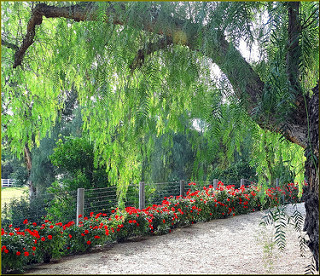

In [8]:
PIL.Image.open(str(roses[1]))

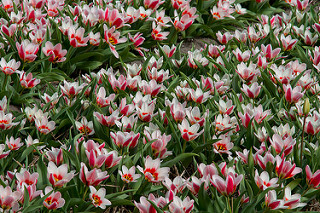

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [37]:
class_names = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5172171681_5934378f08.jpg'),
 PosixPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3871586333_5a708d5cf4_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5172171681_5934378f08.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(333, 500, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [19]:
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.3904 - loss: 1.4266
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6249 - loss: 0.9903
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6989 - loss: 0.7838
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8113 - loss: 0.5425
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9114 - loss: 0.2789
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9495 - loss: 0.1734
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9739 - loss: 0.1010
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9671 - loss: 0.1179
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9894 - loss: 0.0442
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9892 - loss: 0.0562
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9920 - loss: 0.0360
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.

# Visualize the learning curve of training

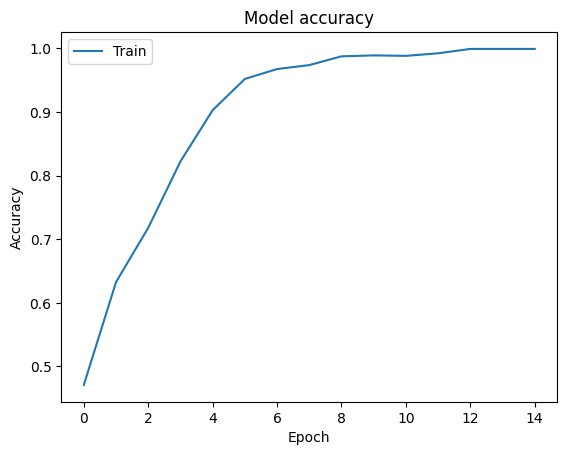

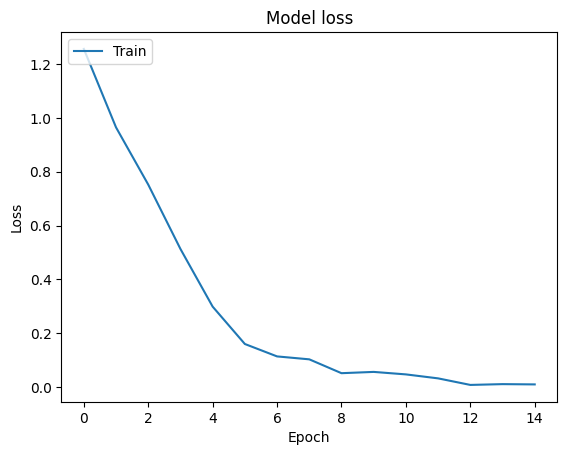

In [24]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history["loss"])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel ('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [43]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.6879 - loss: 2.1475


[2.144395112991333, 0.6753812432289124]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (63) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [27]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 372ms/step


array([[ -5.404394  ,   5.363106  ,  -8.549575  , -15.136939  ,
         -0.9396419 ],
       [  9.576561  ,  -2.4234903 , -15.114564  , -14.684793  ,
          7.167842  ],
       [ -2.5865488 ,   3.4892163 ,  -6.2482276 , -11.932906  ,
         -4.5664635 ],
       ...,
       [ -7.2237043 , -16.831053  ,  -3.0793428 ,  19.433027  ,
         -9.021727  ],
       [ -2.8567758 ,  -6.5745792 ,  -2.3341496 ,  -5.4276237 ,
         -0.95648366],
       [-14.719992  , -13.626891  ,   3.8301444 ,   7.934851  ,
         -6.9277925 ]], dtype=float32)

In [28]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(918, 5), dtype=float32, numpy=
array([[2.1034399e-05, 9.9815011e-01, 9.0572308e-07, 1.2477831e-09,
        1.8278784e-03],
       [9.1748458e-01, 5.6369304e-06, 1.7353213e-11, 2.6670209e-11,
        8.2509771e-02],
       [2.2917583e-03, 9.9733275e-01, 5.8873782e-05, 2.0003094e-07,
        3.1644848e-04],
       ...,
       [2.6492868e-12, 1.7811896e-16, 1.6710963e-10, 1.0000000e+00,
        4.3879071e-13],
       [1.0554026e-01, 2.5632842e-03, 1.7798845e-01, 8.0707371e-03,
        7.0583725e-01],
       [1.4256786e-10, 4.2535225e-10, 1.6227184e-02, 9.8377246e-01,
        3.4524729e-07]], dtype=float32)>

In [29]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.1034397e-05, 9.9815011e-01, 9.0572308e-07, 1.2477831e-09,
       1.8278784e-03], dtype=float32)>

In [30]:
np.argmax(score)

1

In [31]:
y_test[0]

1

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predicted_classes = np.argmax(predictions, axis=1)
classification_report(y_test, predicted_classes)

'              precision    recall  f1-score   support\n\n           0       0.55      0.61      0.58       176\n           1       0.64      0.64      0.64       154\n           2       0.72      0.77      0.74       226\n           3       0.74      0.75      0.75       150\n           4       0.72      0.59      0.65       212\n\n    accuracy                           0.68       918\n   macro avg       0.68      0.67      0.67       918\nweighted avg       0.68      0.68      0.68       918\n'

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       176
           1       0.64      0.64      0.64       154
           2       0.72      0.77      0.74       226
           3       0.74      0.75      0.75       150
           4       0.72      0.59      0.65       212

    accuracy                           0.68       918
    macro avg       0.68      0.67     0.67       918
    weighted avg    0.68      0.68     0.68       918


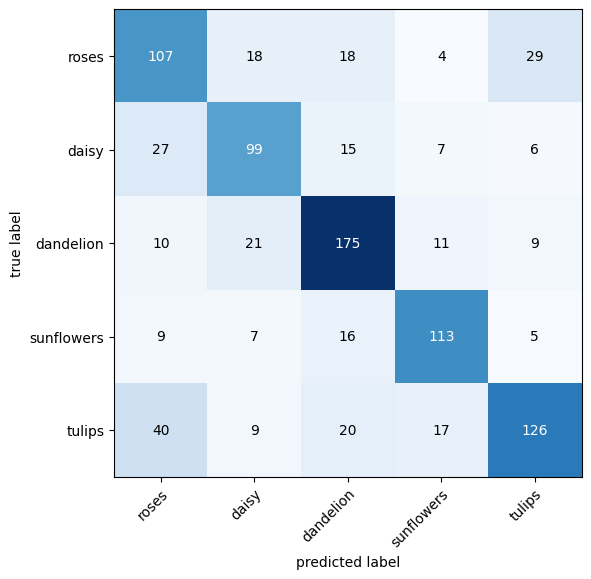

In [42]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

mat = confusion_matrix(y_test, predicted_classes)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(6, 6), class_names=class_names, show_normed=False)

plt.tight_layout()
plt.show()

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [33]:
img_height = 180
img_width = 180
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Original Image**

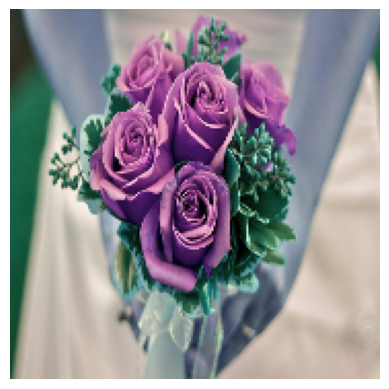

In [34]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

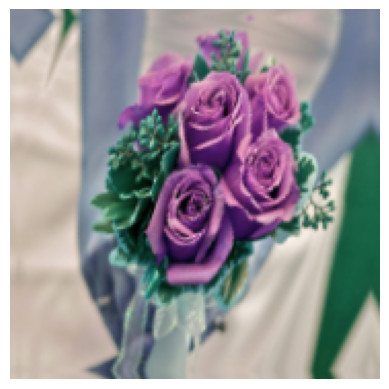

In [35]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation</h3>

In [44]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 76s 855ms/step - accuracy: 0.2636 - loss: 1.5807
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 869ms/step - accuracy: 0.4820 - loss: 1.2418
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 847ms/step - accuracy: 0.6115 - loss: 0.9855
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 867ms/step - accuracy: 0.6357 - loss: 0.8998
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 79s 834ms/step - accuracy: 0.6544 - loss: 0.8708
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 862ms/step - accuracy: 0.6943 - loss: 0.7983
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 73s 845ms/step - accuracy: 0.6862 - loss: 0.7852
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 72s 840ms/step - accuracy: 0.7353 - loss: 0.7063
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 842ms/step - accuracy: 0.7271 - loss: 0.6940
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 73s 845ms/step - accuracy: 0.7216 - loss: 0.7109
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 74s 868ms/step - accuracy: 0.7401 - loss: 0.6691
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 80

In [46]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.6902 - loss: 0.8777


[0.8416661620140076, 0.6949890851974487]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**

In [47]:
aug_predictions = model.predict(X_test_scaled)
aug_predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step


array([[-1.0146294e+00,  5.7429004e+00,  7.7830374e-01,  4.7417489e-01,
        -3.6130777e-01],
       [ 6.4768200e+00,  3.2925899e+00, -3.8450410e+00, -2.5107460e+00,
         5.0520501e+00],
       [ 7.5999750e-03,  1.6522875e+00,  3.6763507e-01, -1.9407389e+00,
         7.6868063e-01],
       ...,
       [-4.2883863e+00, -1.4053653e+01,  9.6422386e+00,  1.6309605e+01,
         9.7558516e-01],
       [ 1.5063713e+00,  9.2067164e-01, -4.8386186e-02, -2.9584017e+00,
         5.6012166e-01],
       [-1.0536988e+00, -1.4951577e+00,  1.5429869e+00,  3.5323744e+00,
        -5.1872766e-01]], dtype=float32)

In [48]:
predicted_classes = np.argmax(aug_predictions, axis=1)
classification_report(y_test, predicted_classes)

'              precision    recall  f1-score   support\n\n           0       0.58      0.70      0.63       176\n           1       0.70      0.73      0.71       154\n           2       0.86      0.69      0.77       226\n           3       0.63      0.91      0.74       150\n           4       0.75      0.52      0.61       212\n\n    accuracy                           0.69       918\n   macro avg       0.70      0.71      0.69       918\nweighted avg       0.72      0.69      0.69       918\n'

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       176
           1       0.70      0.83      0.76       154
           2       0.78      0.82      0.80       226
           3       0.77      0.81      0.79       150
           4       0.76      0.61      0.68       212

    accuracy                           0.73       918
    macro avg      0.73      0.74      0.73       918
    weighted avg   0.73      0.73      0.73       918


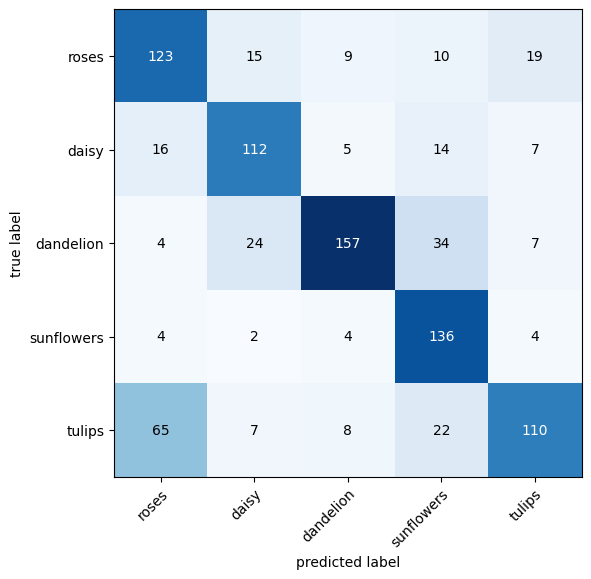

In [51]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

mat = confusion_matrix(y_test, predicted_classes)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(6, 6), class_names=class_names, show_normed=False)

plt.tight_layout()
plt.show()